# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information. 

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021: 

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

In [196]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set_theme()

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other. 

    What is the **shape** of the `fnd` DataFrame? 

In [197]:
os.chdir('/Users/iliaromanov/Documents/Data Analytics/git/3.15.x-Final-Assignment')

files = os.listdir('data') 

fnd = pd.DataFrame([])

for i in files:
    if len(i)==23:
        df_tmp = pd.read_csv('data/' +i)
        df_tmp['Year'] = i[15:19]
        fnd = fnd.append(df_tmp)
    else:
        False

/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/1336491626.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/1336491626.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/1336491626.py:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [198]:
fnd.shape

(2343, 10)

2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types. 

    What is the **total** `Amount($)` of funding given in the three years available?

In [199]:
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2102 non-null   object
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   object
dtypes: object(10)
memory usage: 201.4+ KB


In [200]:
fnd['Founded'] = pd.to_numeric(fnd['Founded'], errors='coerce')
fnd['Founded'] = fnd['Founded'].fillna(0)
fnd['Founded'] = fnd['Founded'].astype(int)
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  2343 non-null   object
 1   Founded        2343 non-null   int64 
 2   HeadQuarter    2228 non-null   object
 3   Sector         2325 non-null   object
 4   What it does   2343 non-null   object
 5   Founders       2324 non-null   object
 6   Investor       2243 non-null   object
 7   Amount($)      2211 non-null   object
 8   Stage          1220 non-null   object
 9   Year           2343 non-null   object
dtypes: int64(1), object(9)
memory usage: 201.4+ KB


In [201]:
fnd['Amount($)'] = fnd['Amount($)'].fillna(0)
fnd['Amount($)'] = fnd['Amount($)'].str.replace('Undisclosed', '0')
fnd['Amount($)'] = fnd['Amount($)'].str.replace(',', '')
fnd['Amount($)'] = fnd['Amount($)'].str.replace('$', '')
fnd['Amount($)'] = fnd['Amount($)'].astype('float')
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int64  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      2211 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 201.4+ KB


/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/1851292456.py:4: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [202]:
fnd['Year'] = fnd['Year'].astype('int')
fnd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  2343 non-null   object 
 1   Founded        2343 non-null   int64  
 2   HeadQuarter    2228 non-null   object 
 3   Sector         2325 non-null   object 
 4   What it does   2343 non-null   object 
 5   Founders       2324 non-null   object 
 6   Investor       2243 non-null   object 
 7   Amount($)      2211 non-null   float64
 8   Stage          1220 non-null   object 
 9   Year           2343 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 201.4+ KB


In [203]:
fnd['Amount($)'].sum()

271544633855.83002

3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021). 

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [204]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [205]:
fnd2 = fnd.loc[fnd['Year']==2020]
fnd2 = fnd2.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(5)
fnd2.index = pd.RangeIndex(len(fnd2))
fnd2['rank'] = fnd2.index + 1
fnd2

,Investor,size,rank
0,Venture Catalysts,20,1
1,Mumbai Angels Network,12,2
2,Angel investors,12,3
3,Inflection Point Ventures,11,4
4,Undisclosed,10,5


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**: 
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame: 
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city? 

In [221]:
sps = pd.read_csv('data/Software Professionals Salary.csv')
sps_loc = sps.groupby('Location', as_index=False)['Rating','Salary'].mean()
sps_loc

/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/4138357401.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Location,Rating,Salary
0,Bangalore,3.920232,735344.739593
1,Chennai,3.902726,584559.661513
2,Hyderabad,3.914484,679099.157376
3,Jaipur,3.940741,629135.802469
4,Kerala,3.885185,553577.481481
5,Kolkata,4.024719,710925.573034
6,Madhya Pradesh,3.992258,677641.909677
7,Mumbai,3.881709,961180.368491
8,New Delhi,3.943415,658756.735632
9,Pune,3.886082,690476.311153


In [222]:
paolo = fnd.loc[fnd['Year']==2021]
fnd_loc = paolo.groupby(['HeadQuarter'], as_index=False).agg({'Company/Brand': 'size', 'Amount($)': 'sum'})
fnd_loc.head(5)

,HeadQuarter,Company/Brand,Amount($)
0,Ahmadabad,6,4.300000e+06
1,Ahmedabad,11,1.981550e+08
2,Ambernath,1,0.000000e+00
3,Andheri,1,0.000000e+00
4,Bangalore,425,1.432742e+10


In [223]:
sps_fnd_loc = pd.merge(sps_loc, fnd_loc, how="inner", left_on="Location", right_on="HeadQuarter")
sps_fnd_loc.sort_values('Rating', ascending=False)

,Location,Rating,Salary,HeadQuarter,Company/Brand,Amount($)
4,Kolkata,4.024719,710925.573034,Kolkata,5,2.800000e+07
6,New Delhi,3.943415,658756.735632,New Delhi,143,1.673010e+09
3,Jaipur,3.940741,629135.802469,Jaipur,11,3.433000e+08
0,Bangalore,3.920232,735344.739593,Bangalore,425,1.432742e+10
2,Hyderabad,3.914484,679099.157376,Hyderabad,34,2.439600e+08
1,Chennai,3.902726,584559.661513,Chennai,40,7.171400e+08
7,Pune,3.886082,690476.311153,Pune,46,5.090700e+08
5,Mumbai,3.881709,961180.368491,Mumbai,200,1.538303e+11


In [224]:
sps_fnd_loc.drop('HeadQuarter', axis=1, inplace=True)
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000
sps_fnd_loc.drop('Amount($)', axis=1, inplace=True)
sps_fnd_loc.rename(columns={'Location':'City', 'Rating':'Avg. Rating','Salary':'Avg. Salary','Company/Brand':'Nr. Companies Funded','Amount($)':'Sum Funding ($MM)'}, inplace=True)
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Amount($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,New Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees? 

<AxesSubplot:xlabel='Avg. Salary', ylabel='Amount($MM)'>

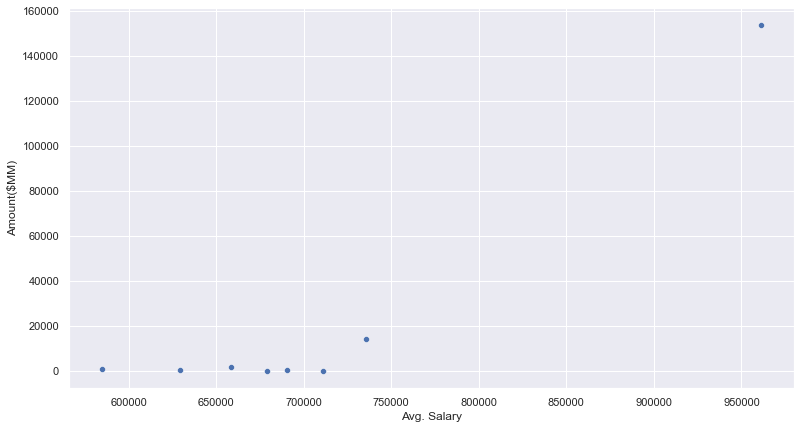

In [226]:
sns.scatterplot(x='Avg. Salary', y='Amount($MM)', data=sps_fnd_loc)

6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem. 
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation. 

In [156]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
import pandas as pd
import lxml


path = '/Users/iliaromanov/Documents/Data Analytics/git/3.14.35-Web-Scraping-and-Web-Interaction'

driver = webdriver.Chrome(path + '/chromedriver')

driver.get("https://www.census2011.co.in/city.php")

webtable_df = pd.read_html(driver.find_element(By.CLASS_NAME, 'table-responsive').get_attribute('outerHTML'))

webtable_df

/var/folders/vb/bxntwrc90ggcyq4rsgsqbvwh0000gn/T/ipykernel_69834/863067812.py:10: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(path + '/chromedriver')


[       #        City           State  Population  Metropolitan  Sexratio  \
 0      1      Mumbai     Maharashtra    12442373      18414288       853   
 1      2       Delhi           Delhi    11034555      16314838       876   
 2      3   Bangalore       Karnataka     8443675       8499399       923   
 3      4   Hyderabad  Andhra Pradesh     6731790       7749334       955   
 4      5   Ahmedabad         Gujarat     5577940       6352254       898   
 ..   ...         ...             ...         ...           ...       ...   
 493  494     Gangtok          Sikkim      100286        100286       912   
 494  495       Datia  Madhya Pradesh      100284        100284       900   
 495  496       Nagda  Madhya Pradesh      100039        100039       947   
 496  497    Banswara       Rajasthan       99969        101177       960   
 497  498  Kapurthala          Punjab       98916         98916       839   
 
      Literacy  
 0       89.73  
 1       87.59  
 2       88.71  
 3    

In [159]:
pippo = webtable_df[0]
pippo

,#,City,State,Population,Metropolitan,Sexratio,Literacy
0,1,Mumbai,Maharashtra,12442373,18414288,853,89.73
1,2,Delhi,Delhi,11034555,16314838,876,87.59
2,3,Bangalore,Karnataka,8443675,8499399,923,88.71
3,4,Hyderabad,Andhra Pradesh,6731790,7749334,955,83.26
4,5,Ahmedabad,Gujarat,5577940,6352254,898,88.29
...,...,...,...,...,...,...,...
493,494,Gangtok,Sikkim,100286,100286,912,89.33
494,495,Datia,Madhya Pradesh,100284,100284,900,80.56
495,496,Nagda,Madhya Pradesh,100039,100039,947,80.71
496,497,Banswara,Rajasthan,99969,101177,960,85.72


In [166]:
pippo1 = pippo.sort_values(by=['Literacy'], ascending=False)
pippo1.head(5)

,#,City,State,Population,Metropolitan,Sexratio,Literacy
150,151,Aizawl,Mizoram,293416,293416,1025,98.36
73,74,Kochi,Kerala,602046,2117990,1027,97.36
137,138,Thrissur,Kerala,315957,1854783,1075,97.06
102,103,Kozhikode,Kerala,431560,2030519,1093,96.53
267,268,Alappuzha,Kerala,174176,241072,1077,96.20


In [187]:
sps_fnd_loc_lit = pd.merge(sps_fnd_loc, pippo1, how="inner", left_on="City", right_on="City")

In [188]:
sps_fnd_loc_lit

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Amount($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,14327.42,3,Karnataka,8443675,8499399,923,88.71
1,Chennai,3.902726,584559.661513,40,717.14,6,Tamil Nadu,4646732,8696010,989,90.18
2,Hyderabad,3.914484,679099.157376,34,243.96,4,Andhra Pradesh,6731790,7749334,955,83.26
3,Jaipur,3.940741,629135.802469,11,343.30,10,Rajasthan,3046163,3046163,900,83.33
4,Kolkata,4.024719,710925.573034,5,28.00,7,West Bengal,4496694,14112536,908,86.31
5,Mumbai,3.881709,961180.368491,200,153830.30,1,Maharashtra,12442373,18414288,853,89.73
6,Delhi,3.943415,658756.735632,143,1673.01,2,Delhi,11034555,16314838,876,87.59
7,Pune,3.886082,690476.311153,46,509.07,9,Maharashtra,3124458,5049968,948,89.56


In [227]:
city_1 = pippo['City'].unique()
city_2 = sps_fnd_loc['City'].unique()
city_missing = [x for x in city_2 if x not in city_1]
sps_fnd_loc[sps_fnd_loc['City'].isin(city_missing)]

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Amount($MM)
6,New Delhi,3.943415,658756.735632,143,1673.01


In [228]:
sps_fnd_loc.replace(to_replace='New Delhi', value = 'Delhi', inplace=True)

In [229]:
sps_fnd_loc

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Amount($MM)
0,Bangalore,3.920232,735344.739593,425,14327.42
1,Chennai,3.902726,584559.661513,40,717.14
2,Hyderabad,3.914484,679099.157376,34,243.96
3,Jaipur,3.940741,629135.802469,11,343.30
4,Kolkata,4.024719,710925.573034,5,28.00
5,Mumbai,3.881709,961180.368491,200,153830.30
6,Delhi,3.943415,658756.735632,143,1673.01
7,Pune,3.886082,690476.311153,46,509.07


<AxesSubplot:xlabel='Literacy', ylabel='Avg. Salary'>

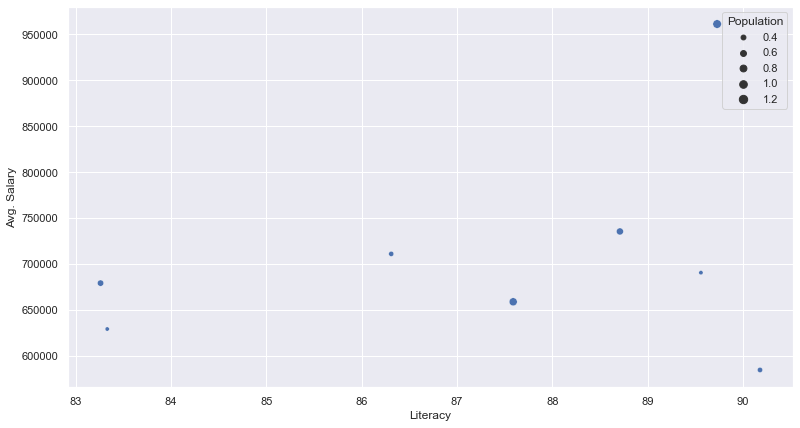

In [230]:
sns.set(rc={'figure.figsize':(13, 7)})
sns.scatterplot(x='Literacy', y='Avg. Salary', size='Population', data=sps_fnd_loc_lit)

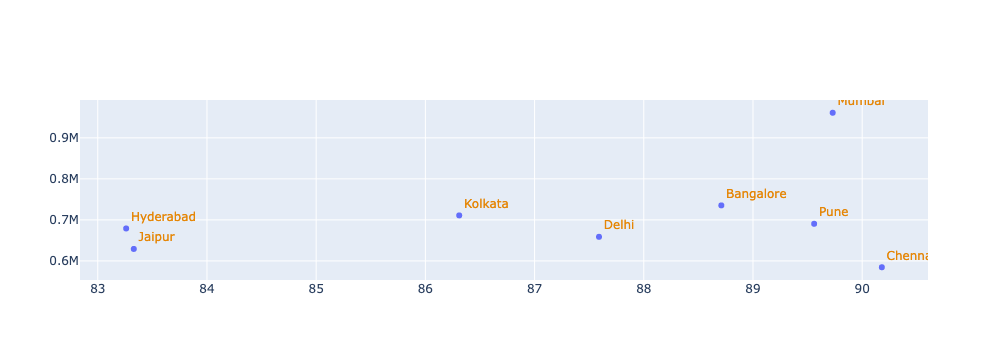

In [240]:
import plotly.graph_objects as go
data = go.Scatter(x=sps_fnd_loc_lit['Literacy'],
                  y=sps_fnd_loc_lit['Avg. Salary'],
                  text=sps_fnd_loc_lit['City'],
                  textposition='top right',
                  textfont=dict(color='#E58606'),
                  mode='markers+text',
                  name='citations')

fig = go.Figure(data=data)

fig.show()